# Test Notebook

***

## Description
This is a test notebook to do data exploration of the dataset "Recorded Crime: Geographic Breakdown" avaliable from the Metropolitan Police.

The URL for this data is: https://data.london.gov.uk/dataset/recorded_crime_summary

The description of the data is detailed below:

> This data counts the number of crimes at three different geographic levels of London (borough, ward, LSOA) per month, according to crime type. 

> Data is available in two files for each level of geography - the most up to date data covering the last available 24 months only and one covering all historic full calendar years.

> In March 2019, the Metropolitan Police Service started to provide offences grouped by the updated Home Office crime classifications . This currently only covers the most recent 24 months of data, but historic data using the previous categories is available separately back to January 2008

The types of crime that are covered are listed below: 

**Major Category**:  Minor Category 

**Arson and Criminal Damage** - Arson / Criminal Damage

**Burglary**: Burglary - Business and Community / Burglary - Residential**

**Drug Offences**: Drug Trafficking / Possession of Drugs

**Miscellaneous Crimes Against Society**: Absconding from Lawful Custody / Bail Offences / Bigamy / Concealing an Infant Death Close to Birth / Dangerous Driving / Disclosure, Obstruction, False or Misleading State / Exploitation of Prostitution / Forgery or Use of Drug Prescription / Fraud or Forgery Associated with Driver Records / Going Equipped for Stealing / Handling Stolen Goods / Making, Supplying or Possessing Articles for use i / Obscene Publications / Offender Management Act / Other Forgery / Other Notifiable Offences / Perjury / Perverting Course of Justice / Possession of False Documents / Profitting From or Concealing Proceeds of Crime / Soliciting for Prostitution / Threat or Possession With Intent to Commit Crimina / Wildlife Crime

**Possession of Weapons**: Other Firearm Offences / Possession of Firearm with Intent / Possession of Firearms Offences / Possession of Other Weapon / Possession of Article with Blade or Point

**Public Order Offences**: Other Offences Against the State, or Public Order / Public Fear Alarm or Distress / Racially or Religiously Aggravated Public Fear / Violent Disorder

**Robbery**: Robbery of Business Property / Robbery of Personal Property

**Sexual Offences**: Other Sexual Offences / Rape

**Theft**: Bicycle Theft / Other Theft / Shoplifting / Theft from Person

**Vehicle Offences**: Aggravated Vehicle Taking / Interfering with a Motor Vehicle / Theft from a Motor Vehicle / Theft or Taking of a Motor Vehicle

**Violence Against the Person**: Homicide / Violence with Injury / Violence without Injury

In [1]:
# Python Dependencies
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Data Loading
# > MPS Borough Level Crime (most recent 24 months)
url = "https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv"
df = pd.read_csv(url) 
# > MPS Borough Level Crime (historic) - 01/02/2014 to 31/03/2017
# url = "https://data.london.gov.uk/download/recorded_crime_summary/2bbd58c7-6be6-40ac-99ed-38c0ee411c8e/MPS_Borough_Level_Crime_Historic.csv"
# df = pd.read_csv(url)

In [4]:
# Data Exploration
df.shape

(1567, 27)

In [4]:
df.head()

,MajorText,MinorText,LookUp_BoroughName,201805,201806,201807,201808,201809,201810,201811,...,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004
0,Arson and Criminal Damage,Arson,Barking and Dagenham,4,12,6,5,3,8,5,...,5,3,6,9,8,6,4,5,6,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,126,123,127,101,107,132,105,...,134,118,109,109,97,121,97,103,108,82
2,Burglary,Burglary - Business and Community,Barking and Dagenham,24,33,30,18,33,32,39,...,31,35,37,30,30,25,31,17,27,29
3,Burglary,Burglary - Residential,Barking and Dagenham,93,77,94,84,99,94,106,...,71,67,80,97,114,130,116,123,97,56
4,Drug Offences,Drug Trafficking,Barking and Dagenham,8,6,8,7,10,7,7,...,11,7,7,10,12,3,11,3,6,9


In [5]:
# Data and Column Cleanup - Non-date columns
nDf = df
nDf = nDf.rename(columns={"MajorText": "crime_major",
                          "MinorText": "crime_minor",
                          "LookUp_BoroughName": "borough"})
nDf.head(1)

,crime_major,crime_minor,borough,201805,201806,201807,201808,201809,201810,201811,...,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004
0,Arson and Criminal Damage,Arson,Barking and Dagenham,4,12,6,5,3,8,5,...,5,3,6,9,8,6,4,5,6,2


In [6]:
# Data and Column Cleanup - Date columns
keepCols = list(nDf.columns[0:3])
dateCols = list(nDf.columns[3:])
display(keepCols)
display(dateCols)

['crime_major', 'crime_minor', 'borough']

['201805',
 '201806',
 '201807',
 '201808',
 '201809',
 '201810',
 '201811',
 '201812',
 '201901',
 '201902',
 '201903',
 '201904',
 '201905',
 '201906',
 '201907',
 '201908',
 '201909',
 '201910',
 '201911',
 '201912',
 '202001',
 '202002',
 '202003',
 '202004']

In [7]:
# > Create function to convert date in CSV to a datetime object of YYYY-MM
def dateConvert(x):
    tempDate = datetime.strptime(x,"%Y%m")
    tempOut = tempDate.strftime("%Y-%m")
    return tempOut

# > Convert all date columns to new date and replace
nDateCols = [dateConvert(x) for x in dateCols]
keepCols.extend(nDateCols)
nDf.columns = keepCols
nDf.head(5)

,crime_major,crime_minor,borough,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,...,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04
0,Arson and Criminal Damage,Arson,Barking and Dagenham,4,12,6,5,3,8,5,...,5,3,6,9,8,6,4,5,6,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,126,123,127,101,107,132,105,...,134,118,109,109,97,121,97,103,108,82
2,Burglary,Burglary - Business and Community,Barking and Dagenham,24,33,30,18,33,32,39,...,31,35,37,30,30,25,31,17,27,29
3,Burglary,Burglary - Residential,Barking and Dagenham,93,77,94,84,99,94,106,...,71,67,80,97,114,130,116,123,97,56
4,Drug Offences,Drug Trafficking,Barking and Dagenham,8,6,8,7,10,7,7,...,11,7,7,10,12,3,11,3,6,9


In [8]:
# Identify the different boroughs present in the dataset
uniqueBoroughs = list(nDf['borough'].unique())
display(uniqueBoroughs)

['Barking and Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'London Heathrow and London City Airports',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster']

In [9]:
# Identify the different major crimes present in the dataset
uniqueCrimes = list(nDf['crime_major'].unique())
display(uniqueCrimes)

['Arson and Criminal Damage',
 'Burglary',
 'Drug Offences',
 'Miscellaneous Crimes Against Society',
 'Possession of Weapons',
 'Public Order Offences',
 'Robbery',
 'Sexual Offences',
 'Theft',
 'Vehicle Offences',
 'Violence Against the Person']

### Borough Test - Greenwich

In [10]:
# Data Test - Looking at Data avaliable for Greenwich borough
borough = 'Greenwich'
iDf = nDf[nDf['borough'] == borough]

In [11]:
# Identify all minor crimes
display(list(nDf['crime_minor'].unique()))

['Arson',
 'Criminal Damage',
 'Burglary - Business and Community',
 'Burglary - Residential',
 'Drug Trafficking',
 'Possession of Drugs',
 'Bail Offences',
 'Bigamy',
 'Dangerous Driving',
 'Disclosure, Obstruction, False or Misleading State',
 'Exploitation of Prostitution',
 'Fraud or Forgery Associated with Driver Records',
 'Going Equipped for Stealing',
 'Handling Stolen Goods',
 'Making, Supplying or Possessing Articles for use i',
 'Obscene Publications',
 'Other Forgery',
 'Other Notifiable Offences',
 'Perjury',
 'Perverting Course of Justice',
 'Possession of False Documents',
 'Profitting From or Concealing Proceeds of Crime',
 'Threat or Possession With Intent to Commit Crimina',
 'Wildlife Crime',
 'Other Firearm Offences',
 'Possession of Article with Blade or Point',
 'Possession of Firearm with Intent',
 'Possession of Firearms Offences',
 'Possession of Other Weapon',
 'Other Offences Against the State, or Public Order',
 'Public Fear Alarm or Distress',
 'Racially o

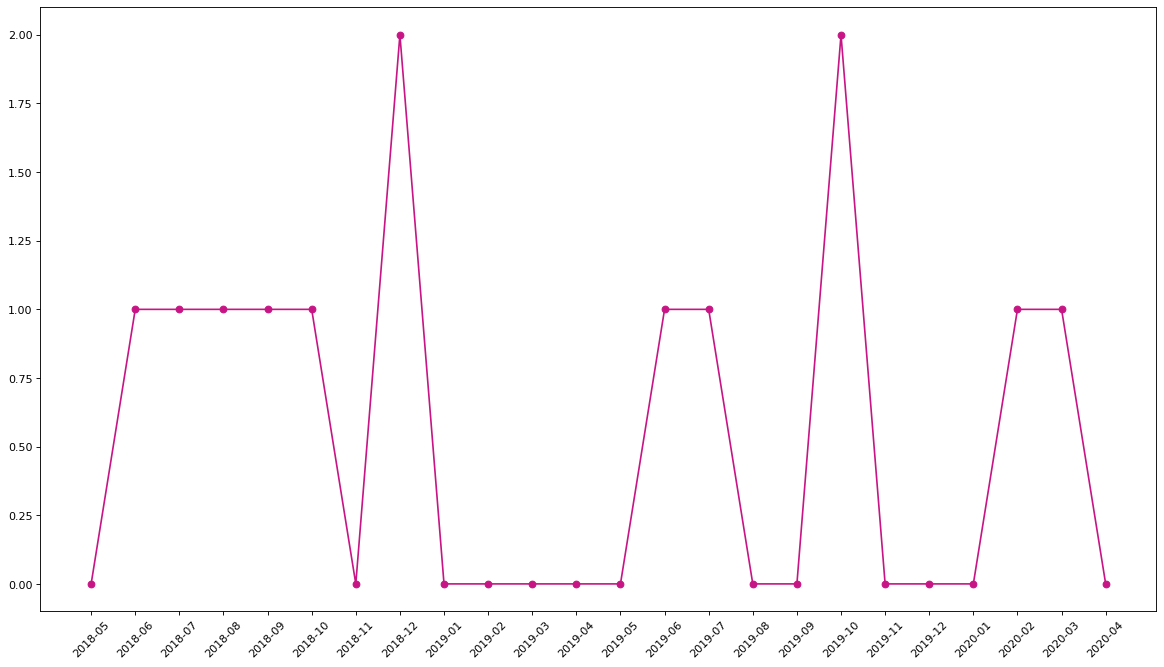

In [12]:
# > Select minor crime
crime = 'Homicide'
cDf = iDf[iDf['crime_minor'] == crime]
# > Fix data for plotting
cDf = cDf.iloc[:,3:]
cDf = cDf.transpose()
cDf.columns = ['Arson']
# > Plot data
x = cDf.index
y = cDf['Arson']
plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x, y, marker = 'o', color='mediumvioletred')
plt.xticks(rotation=45)
plt.show()


### Crime Test - Racially or Religiously Aggravated Public Fear, Al vs All Boroughs

In [13]:
# > Filter for just Homocide minor crime
crime = 'Racially or Religiously Aggravated Public Fear, Al'
cDf = nDf[nDf['crime_minor'] == crime]
# > Drop coloumns no longer needed
cDf = cDf.iloc[:,2:]
cDf.head()

,borough,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,...,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04
31,Barking and Dagenham,13,14,15,15,12,18,9,20,16,...,18,19,23,28,15,30,16,16,20,17
79,Barnet,41,43,59,24,30,53,27,25,24,...,59,41,29,25,44,34,31,35,29,23
123,Bexley,7,8,11,15,10,18,12,9,12,...,16,18,15,25,18,12,17,17,16,10
171,Brent,38,39,34,27,26,35,32,21,23,...,37,35,23,29,36,23,31,32,28,35
217,Bromley,24,29,30,16,21,28,9,17,16,...,26,20,29,21,24,20,25,12,16,14


In [14]:
# > Change dataframe to date vs borough
tDf = cDf.T
tDf.columns = tDf.iloc[0]
tDf = tDf.iloc[1:,:]

In [15]:
listMax = []
listMin = []
for col in tDf.columns:
    listMax.append(np.max(tDf[col]))
    listMin.append(np.min(tDf[col]))
    print(col,': max ('+str(np.max(tDf[col]))+') min ('+str(np.min(tDf[col])),')')
oneMax = np.max(listMax)
oneMin = np.min(listMin)
print('\n')
for col in tDf.columns:
    testMax = np.max(tDf[col])
    if testMax == oneMax:
        print('This borough,',col+', has one of the highest incidence of:',crime)
        print('Value of:',testMax)
        print('\n')
    testMin = np.min(tDf[col])
    if testMin == oneMin:
        print('This borough,',col+', has one of the lowest incidence of:',crime)
        print('Value of:',testMin)
        print('\n')

Barking and Dagenham : max (30) min (9 )
Barnet : max (59) min (23 )
Bexley : max (25) min (6 )
Brent : max (40) min (21 )
Bromley : max (30) min (9 )
Camden : max (58) min (19 )
Croydon : max (52) min (21 )
Ealing : max (52) min (16 )
Enfield : max (29) min (11 )
Greenwich : max (45) min (13 )
Hackney : max (51) min (17 )
Hammersmith and Fulham : max (44) min (17 )
Haringey : max (46) min (19 )
Harrow : max (24) min (10 )
Havering : max (29) min (7 )
Hillingdon : max (42) min (14 )
Hounslow : max (42) min (14 )
Islington : max (40) min (17 )
Kensington and Chelsea : max (31) min (12 )
Kingston upon Thames : max (21) min (5 )
Lambeth : max (51) min (22 )
Lewisham : max (44) min (18 )
London Heathrow and London City Airports : max (6) min (0 )
Merton : max (20) min (5 )
Newham : max (45) min (23 )
Redbridge : max (31) min (12 )
Richmond upon Thames : max (18) min (6 )
Southwark : max (55) min (16 )
Sutton : max (33) min (5 )
Tower Hamlets : max (46) min (25 )
Waltham Forest : max (32) m

In [17]:
# Overview of current frame
tDf.head()

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
2018-05,13,41,7,38,24,44,31,52,20,23,...,10,25,26,11,29,18,36,24,21,86
2018-06,14,43,8,39,29,42,30,24,25,17,...,8,32,25,13,21,17,32,32,18,74
2018-07,15,59,11,34,30,36,26,32,16,33,...,18,35,31,13,38,10,33,32,28,67
2018-08,15,24,15,27,16,24,29,25,11,18,...,14,25,14,8,32,23,37,20,24,56
2018-09,12,30,10,26,21,31,23,26,19,15,...,11,30,17,8,34,10,32,24,18,75


In [23]:
# Melt the dataframe
meltedDf = pd.melt(tDf)
meltedDf.head(5)

,borough,value
0,Barking and Dagenham,13
1,Barking and Dagenham,14
2,Barking and Dagenham,15
3,Barking and Dagenham,15
4,Barking and Dagenham,12


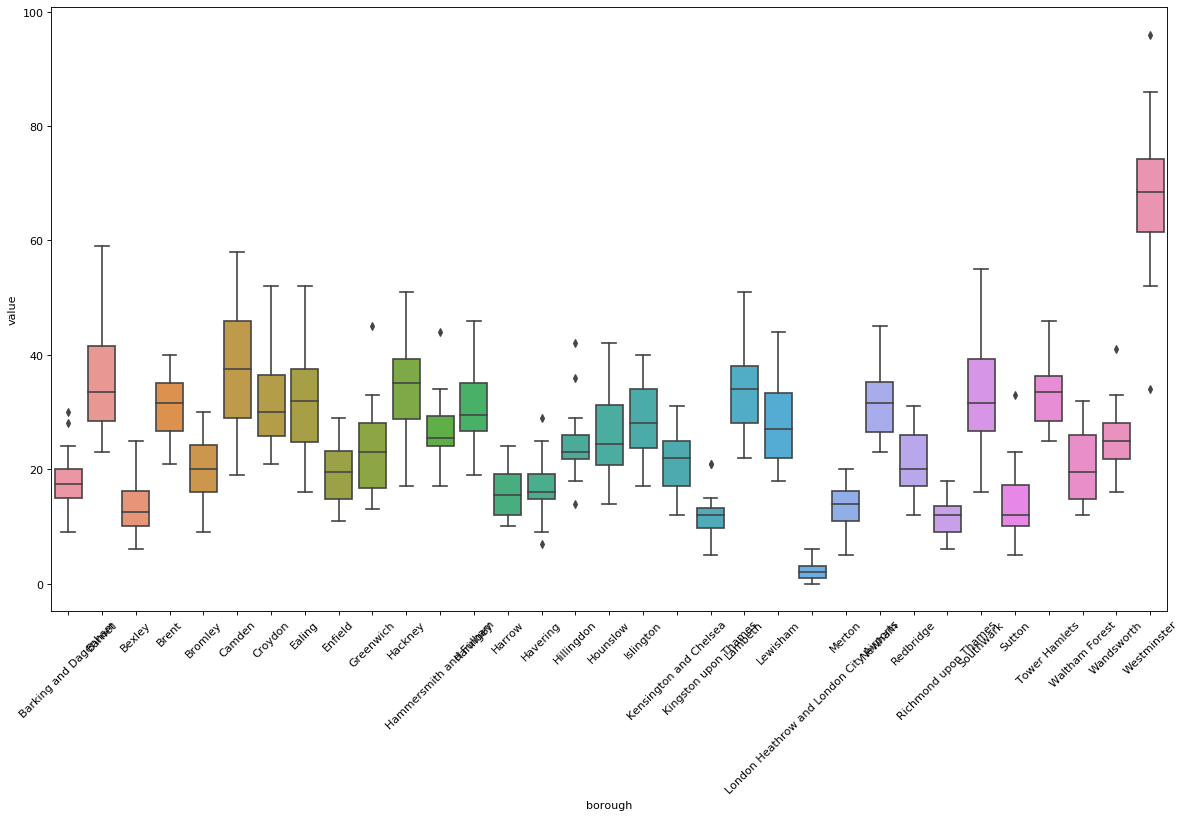

In [28]:
# Create Plot
plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.xticks(rotation=45)
sns.boxplot(x = meltedDf.borough, y = meltedDf.value)